In [1]:
pip install PyAlgoTrade

  Created wheel for PyAlgoTrade: filename=PyAlgoTrade-0.20-cp37-none-any.whl size=159548 sha256=6e5f050134a27e6d148c9b2aea34e7187b23abf1881ccec4a71c59a49ceb7c43
  Stored in directory: C:\Users\uriel\AppData\Local\pip\Cache\wheels\12\b8\69\31e68bb2e66b8003d95ca66578721957a5f6c647363ee16cf2
  Created wheel for ws4py: filename=ws4py-0.5.1-cp37-none-any.whl size=45221 sha256=a3c7097325e2acbd2b716bcb329404076ab3094dbbc05a8f4e6f892426b07f2d
  Stored in directory: C:\Users\uriel\AppData\Local\pip\Cache\wheels\a2\6e\4e\8b0ae12fb9b8a05715256952cf7609a8ab86285fab99b88c68
Successfully built PyAlgoTrade ws4py
Note: you may need to restart the kernel to use updated packages.


In [1]:
from __future__ import print_function

from pyalgotrade import strategy
from pyalgotrade import plotter
from pyalgotrade.tools import quandl
from pyalgotrade.technical import bollinger
from pyalgotrade.stratanalyzer import sharpe
from pyalgotrade import broker as basebroker
import matplotlib.pyplot as plt

In [2]:
plt.style.use("seaborn-dark")

# Prueba con Bandas de Bollinger

2006-03-03 00:00:00 strategy [INFO] Placing buy market order for 31796 shares
2006-03-03 00:00:00 strategy [INFO] Buy order 1 updated - Status: SUBMITTED
2006-03-06 00:00:00 strategy [INFO] Buy order 1 updated - Status: ACCEPTED
2006-03-06 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill yhoo order [1] for 31796 share/s
2006-03-06 00:00:00 strategy [INFO] Buy order 1 updated - Status: CANCELED
2006-03-08 00:00:00 strategy [INFO] Placing buy market order for 32268 shares
2006-03-08 00:00:00 strategy [INFO] Buy order 2 updated - Status: SUBMITTED
2006-03-09 00:00:00 strategy [INFO] Buy order 2 updated - Status: ACCEPTED
2006-03-09 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill yhoo order [2] for 32268 share/s
2006-03-09 00:00:00 strategy [INFO] Buy order 2 updated - Status: CANCELED
2006-03-09 00:00:00 strategy [INFO] Placing buy market order for 33025 shares
2006-03-09 00:00:00 strategy [INFO] Buy order 3 updated - Status: SUBMITTED
2006-03-10 00:00:00 strategy [

2008-09-29 00:00:00 strategy [INFO] Buy order 24 updated - Status: SUBMITTED
2008-09-30 00:00:00 strategy [INFO] Buy order 24 updated - Status: ACCEPTED
2008-09-30 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill yhoo order [24] for 70618 share/s
2008-09-30 00:00:00 strategy [INFO] Buy order 24 updated - Status: CANCELED
2008-10-02 00:00:00 strategy [INFO] Placing buy market order for 76511 shares
2008-10-02 00:00:00 strategy [INFO] Buy order 25 updated - Status: SUBMITTED
2008-10-03 00:00:00 strategy [INFO] Buy order 25 updated - Status: ACCEPTED
2008-10-03 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill yhoo order [25] for 76511 share/s
2008-10-03 00:00:00 strategy [INFO] Buy order 25 updated - Status: CANCELED
2008-10-06 00:00:00 strategy [INFO] Placing buy market order for 77860 shares
2008-10-06 00:00:00 strategy [INFO] Buy order 26 updated - Status: SUBMITTED
2008-10-07 00:00:00 strategy [INFO] Buy order 26 updated - Status: ACCEPTED
2008-10-07 00:00:00 str

2011-04-20 00:00:00 strategy [INFO] Buy order 47 updated - Status: CANCELED
2011-07-20 00:00:00 strategy [INFO] Placing buy market order for 130211 shares
2011-07-20 00:00:00 strategy [INFO] Buy order 48 updated - Status: SUBMITTED
2011-07-21 00:00:00 strategy [INFO] Buy order 48 updated - Status: ACCEPTED
2011-07-21 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill yhoo order [48] for 130211 share/s
2011-07-21 00:00:00 strategy [INFO] Buy order 48 updated - Status: CANCELED
2011-07-21 00:00:00 strategy [INFO] Placing buy market order for 129157 shares
2011-07-21 00:00:00 strategy [INFO] Buy order 49 updated - Status: SUBMITTED
2011-07-22 00:00:00 strategy [INFO] Buy order 49 updated - Status: ACCEPTED
2011-07-22 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill yhoo order [49] for 129157 share/s
2011-07-22 00:00:00 strategy [INFO] Buy order 49 updated - Status: CANCELED
2011-08-04 00:00:00 strategy [INFO] Placing buy market order for 146271 shares
2011-08-04 00:00:

2014-12-11 00:00:00 strategy [INFO] Buy order 71 updated - Status: ACCEPTED
2014-12-11 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill yhoo order [71] for 60506 share/s
2014-12-11 00:00:00 strategy [INFO] Buy order 71 updated - Status: CANCELED
2014-12-16 00:00:00 strategy [INFO] Placing buy market order for 60946 shares
2014-12-16 00:00:00 strategy [INFO] Buy order 72 updated - Status: SUBMITTED
2014-12-17 00:00:00 strategy [INFO] Buy order 72 updated - Status: ACCEPTED
2014-12-17 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill yhoo order [72] for 60946 share/s
2014-12-17 00:00:00 strategy [INFO] Buy order 72 updated - Status: CANCELED
2015-01-07 00:00:00 strategy [INFO] Placing buy market order for 61272 shares
2015-01-07 00:00:00 strategy [INFO] Buy order 73 updated - Status: SUBMITTED
2015-01-08 00:00:00 strategy [INFO] Buy order 73 updated - Status: ACCEPTED
2015-01-08 00:00:00 broker.backtesting [DEBUG] Not enough cash to fill yhoo order [73] for 61272 sha

Sharpe ratio: 0.34


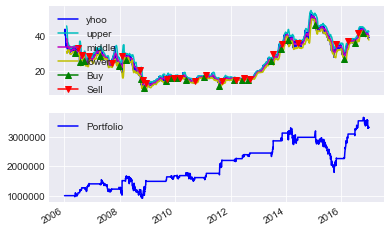

In [10]:
class BBands(strategy.BacktestingStrategy):
    def __init__(self, feed, instrument, bBandsPeriod):
        super(BBands, self).__init__(feed)
        self.__instrument = instrument
        self.__bbands = bollinger.BollingerBands(feed[instrument].getCloseDataSeries(), bBandsPeriod, 2)

    def getBollingerBands(self):
        return self.__bbands

    def onOrderUpdated(self, order):
        if order.isBuy():
            orderType = "Buy"
        else:
            orderType = "Sell"
        self.info("%s order %d updated - Status: %s" % (
            orderType, order.getId(), basebroker.Order.State.toString(order.getState())
        ))

    def onBars(self, bars):
        lower = self.__bbands.getLowerBand()[-1]
        upper = self.__bbands.getUpperBand()[-1]
        if lower is None:
            return

        shares = self.getBroker().getShares(self.__instrument)
        bar = bars[self.__instrument]
        if shares == 0 and bar.getClose() < lower:
            sharesToBuy = int(self.getBroker().getCash(False) / bar.getClose())
            self.info("Placing buy market order for %s shares" % sharesToBuy)
            self.marketOrder(self.__instrument, sharesToBuy)
        elif shares > 0 and bar.getClose() > upper:
            self.info("Placing sell market order for %s shares" % shares)
            self.marketOrder(self.__instrument, -1*shares)


def main(plot):
    instrument = "yhoo"
    bBandsPeriod = 20
    # Download the bars.
    feed = quandl.build_feed("WIKI", [instrument], 2006, 2016, ".")

    strat = BBands(feed, instrument, bBandsPeriod)
    sharpeRatioAnalyzer = sharpe.SharpeRatio()
    strat.attachAnalyzer(sharpeRatioAnalyzer)

    if plot:
        plt = plotter.StrategyPlotter(strat, True, True, True)
        plt.getInstrumentSubplot(instrument).addDataSeries("upper", strat.getBollingerBands().getUpperBand())
        plt.getInstrumentSubplot(instrument).addDataSeries("middle", strat.getBollingerBands().getMiddleBand())
        plt.getInstrumentSubplot(instrument).addDataSeries("lower", strat.getBollingerBands().getLowerBand())

    strat.run()
    print("Sharpe ratio: %.2f" % sharpeRatioAnalyzer.getSharpeRatio(0.05))

    if plot:
        plt.plot()


if __name__ == "__main__":
    main(True)